In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from beakerx import *

from pycta.portfolio import Portfolio
from pycta.analysis import Analysis

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# Load prices
prices = pd.read_csv("data/p_ob.csv", index_col=0, parse_dates=True).ffill().truncate(before="1970-01-01")

In [3]:
# take two moving averages and apply the sign-function, adjust by volatility
def f(price, fast=32, slow=96, volatility=32):
    s = price.ewm(com=slow, min_periods=300).mean()
    f = price.ewm(com=fast, min_periods=300).mean()
    std = price.pct_change().ewm(com=volatility, min_periods=300).std()
    return np.sign(f-s)/std

In [4]:
form = EasyForm("Configuration")
form.addTextField("fast")
form.addTextField("slow")
form.addTextField("volatility")
form.addButton("Go!", tag="run")
form


In [5]:
portfolio = Portfolio(prices=prices, position=prices.apply(f, fast=int(form["fast"] or 32), slow=int(form["slow"] or 96), volatility=int(form["volatility"] or 96)))

In [6]:
a = Analysis(portfolio.nav())
a.performance

Performance number
Annua Return                        13.42
Annua Volatility                    16.03
Annua Sharpe Ratio (r_f = 0)         0.84
Max Drawdown                        48.97
Return                          47,822.82
Kurtosis                             7.79
dtype: object

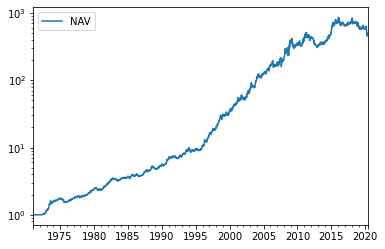

In [7]:
a.nav.plot(logy=True)
plt.show()

In [ ]:
a.monthlytable

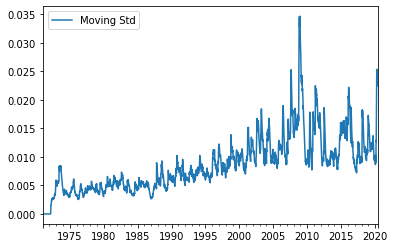

In [8]:
a.std.plot(kind="line")
plt.show()


* This is a **univariate** trading system, we map the (real) price of an asset to its (cash)position
* Only 3 **free parameters** used here.
* Only 4 lines of code
* Scaling the bet-size by volatility has improved the situation.

Results do not look terrible but...
* No concept of risk integrated 

Often hedge funds outsource the risk management to some board or committee
and develop machinery for more systematic **parameter-hacking**.